### COVID-19
### UPDATE by Weeks 
#### started from officially Day 1 (Wednesday 22.01.2020) given in data set and on for every next 7 days)
### Total infected cases, total fatalities, total recovered

In [1]:
# Configuration: setup absolute path to location of package Starts and config-file 
from inspect import getsourcefile
import os.path as path, sys
current_dir = path.dirname(path.abspath(getsourcefile(lambda:0)))
sys.path.insert(0, current_dir[:current_dir.rfind(path.sep)])

from Starts.start import *
from Starts.startml import *
from Starts.startvis import *  
%matplotlib inline
rcParams['figure.figsize'] = 20, 6

C:\Users\lphan\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
Using TensorFlow backend.
C:\Users\lphan\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\lphan\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)

Start importing files in folder
['.gitignore', '01-22-2020.csv', '01-23-2020.csv', '01-24-2020.csv', '01-25-2020.csv', '01-26-2020.csv', '01-27-2020.csv', '01-28-2020.csv', '01-29-2020.csv', '01-30-2020.csv', '01-31-2020.csv', '02-01-2020.csv', '02-02-2020.csv', '02-03-2020.csv', '02-04-2020.csv', '02-05-2020.csv', '02-06-2020.csv', '02-07-2020.csv', '02-08-2020.csv', '02-09-2020.csv', '02-10-2020.csv', '02-11-2020.csv', '02-12-2020.csv', '02-13-2020.csv', '02-14-2020.csv', '02-15-2020.csv', '02-16-2020.csv', '02-17-2020.csv', '02-18-2020.csv', '02-19-2020.csv', '02-20-2020.csv', '02-21-2020.csv', '02-22-2020.csv', '02-23-2020.csv', '02-24-2020.csv', '02-25-2020.csv', '02-26-2020.csv', '02-27-2020.csv', '02-28-2020.csv', '02-29-2020.csv', '03-01-2020.csv', '03-02-2020.csv', '03-03-2020.csv', '03-04-2020.csv', '03-05-2020.csv', '03-06-2020.csv', '03-07-2020.csv', '03-08-2020.csv', '03-09-2020.csv', '03-10-2020.csv', '03-11-2020.csv', '03-12-2020.csv', '03-13-2020.csv', '03-14-2020.csv',

### Number of covid-19 outbreak days 

In [2]:
from covid import *
len(data)

C:\Users\lphan\Anaconda3\lib\site-packages\pandas\core\strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


117

### Total CONFIRMED cases in the World changed by week

[(1, 5578), (2, 23892), (3, 44803), (4, 75138), (5, 80415), (6, 92844), (7, 118582), (8, 197168), (9, 417962), (10, 857487), (11, 1426096), (12, 1976192), (13, 2549123), (14, 3116398), (15, 3662691), (16, 4261955), (17, 4713620)]


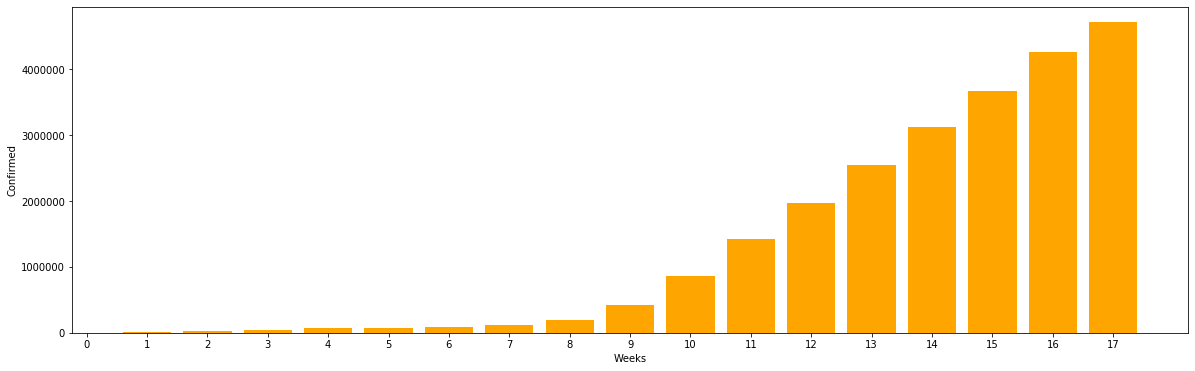

In [3]:
x_weeks = [week for week, value in confirmedByWeek]
y_cases = [value for week, value in confirmedByWeek]
plt.xticks(np.arange(0, max(x_weeks)+1, 1))
plt.bar(x_weeks, y_cases, color='Orange')
plt.xlabel('Weeks')
plt.ylabel('Confirmed')
print(confirmedByWeek)

In [4]:
confirmedByWeek[1][1]

23892

Increasing by Week: 
 [5578, 18314, 20911, 30335, 5277, 12429, 25738, 78586, 220794, 439525, 568609, 550096, 572931, 567275, 546293, 599264, 451665]


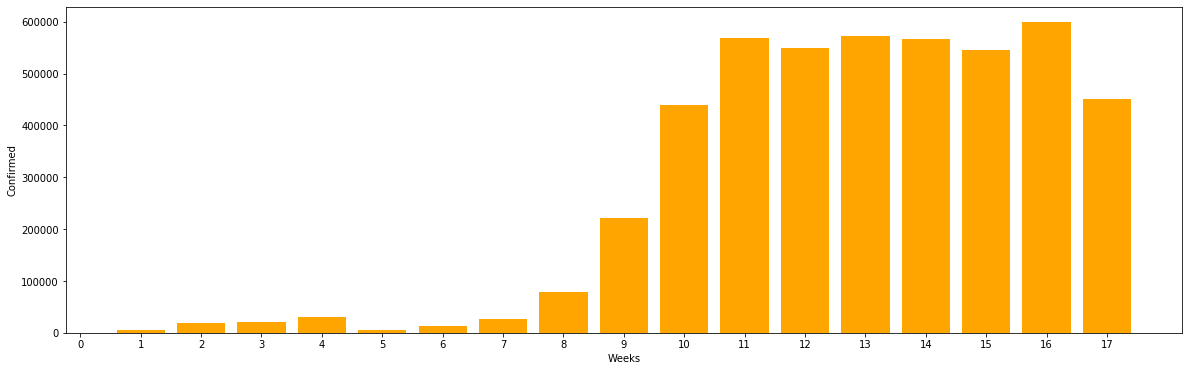

In [5]:
y_cases = [confirmedByWeek[0][1]]+[confirmedByWeek[i+1][1]-confirmedByWeek[i][1] for i in range(len(confirmedByWeek)-1)]
plt.xticks(np.arange(0, max(x_weeks)+1, 1))
plt.bar(x_weeks, y_cases, color='Orange')
plt.xlabel('Weeks')
plt.ylabel('Confirmed')
print("Increasing by Week: \n", y_cases)

### Total FATALITIES cases in the World changed by week

[(1, 131), (2, 492), (3, 1113), (4, 2007), (5, 2708), (6, 3160), (7, 4262), (8, 7905), (9, 18615), (10, 42107), (11, 81865), (12, 125984), (13, 176583), (14, 217153), (15, 257239), (16, 291964), (17, 315185)]


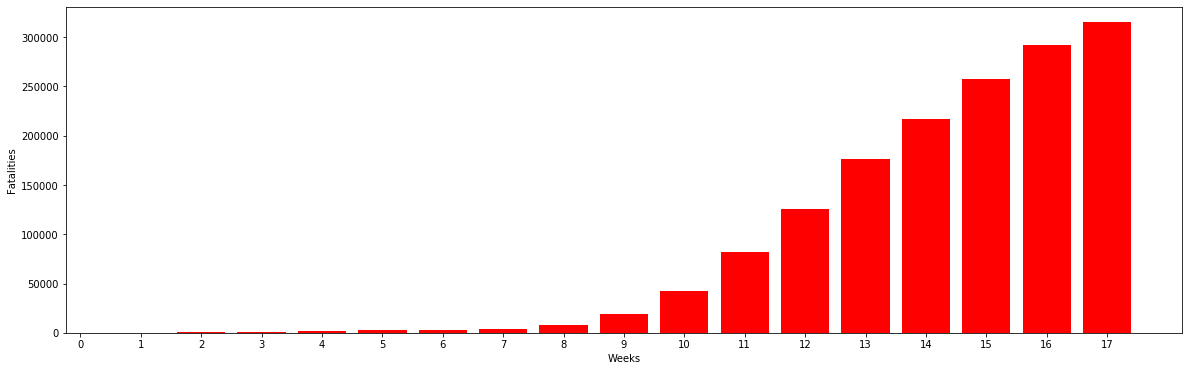

In [6]:
x_weeks = [week for week, value in deathsByWeek]
y_cases = [value for week, value in deathsByWeek]
plt.xticks(np.arange(0, max(x_weeks)+1, 1))
plt.bar(x_weeks, y_cases, color='Red')
plt.xlabel('Weeks')
plt.ylabel('Fatalities')
print(deathsByWeek)

Increasing by Week: 
 [131, 361, 621, 894, 701, 452, 1102, 3643, 10710, 23492, 39758, 44119, 50599, 40570, 40086, 34725, 23221]


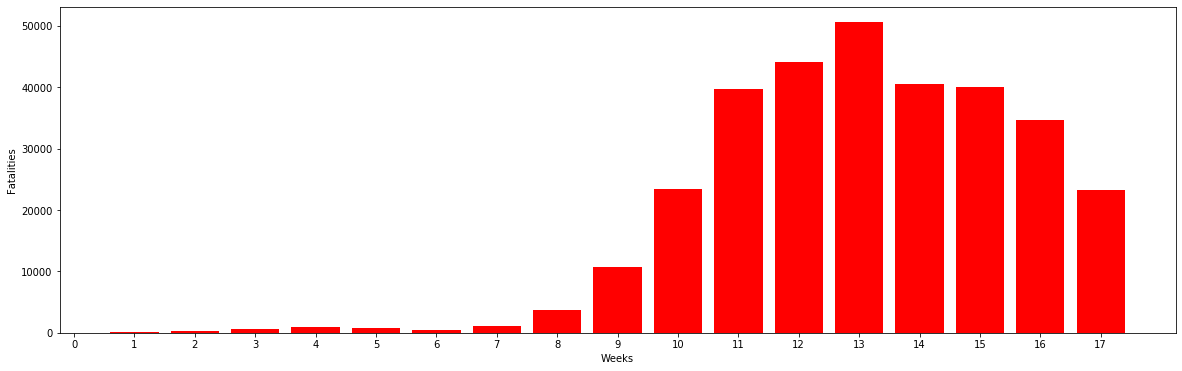

In [7]:
y_cases = [deathsByWeek[0][1]]+[deathsByWeek[i+1][1]-deathsByWeek[i][1] for i in range(len(deathsByWeek)-1)]
plt.xticks(np.arange(0, max(x_weeks)+1, 1))
plt.bar(x_weeks, y_cases, color='Red')
plt.xlabel('Weeks')
plt.ylabel('Fatalities')
print("Increasing by Week: \n", y_cases)

### Total RECOVERED cases in the World changed by week

[(1, 107), (2, 852), (3, 4683), (4, 14352), (5, 27905), (6, 48229), (7, 64404), (8, 80840), (9, 107699), (10, 178028), (11, 300054), (12, 474261), (13, 679819), (14, 928658), (15, 1198832), (16, 1493414), (17, 1733963)]


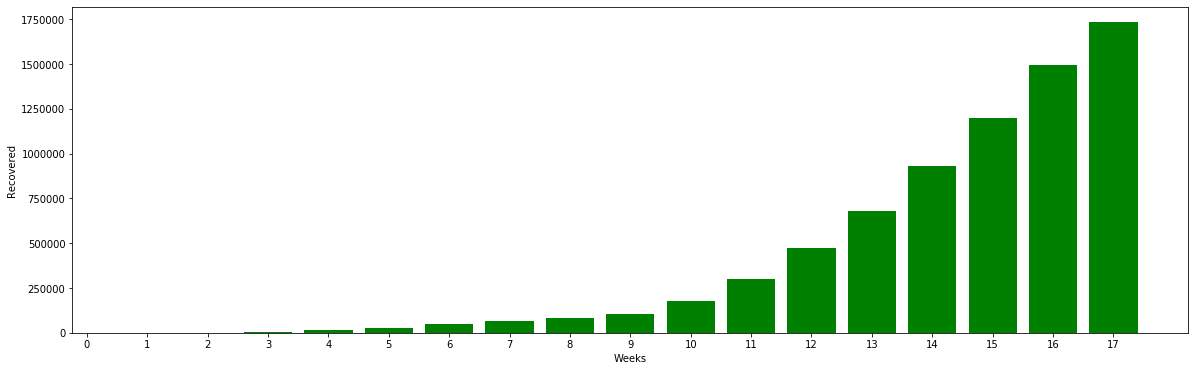

In [8]:
x_weeks = [week for week, value in recoveredByWeek]
y_cases = [value for week, value in recoveredByWeek]
plt.xticks(np.arange(0, max(x_weeks)+1, 1))
plt.bar(x_weeks, y_cases, color='Green')
plt.xlabel('Weeks')
plt.ylabel('Recovered')
print(recoveredByWeek)

Increasing by Week: 
 [107, 745, 3831, 9669, 13553, 20324, 16175, 16436, 26859, 70329, 122026, 174207, 205558, 248839, 270174, 294582, 240549]


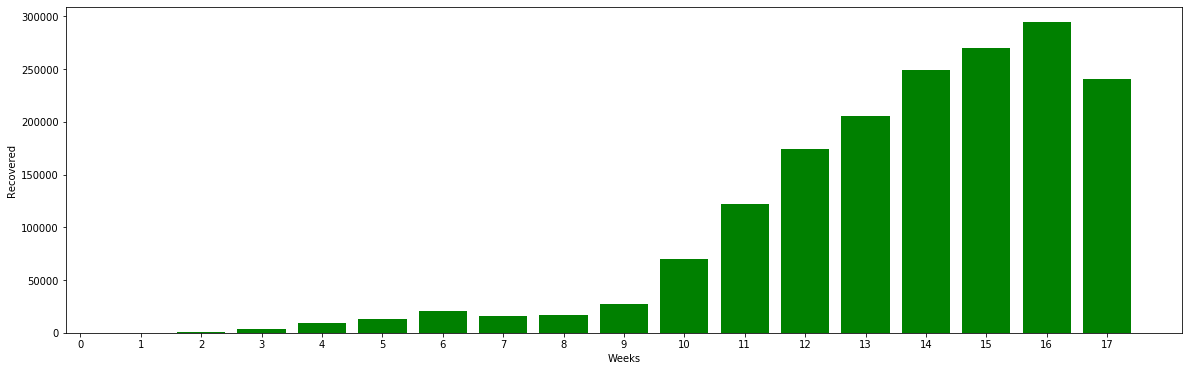

In [9]:
y_cases = [recoveredByWeek[0][1]]+[recoveredByWeek[i+1][1]-recoveredByWeek[i][1] for i in range(len(recoveredByWeek)-1)]
plt.xticks(np.arange(0, max(x_weeks)+1, 1))
plt.bar(x_weeks, y_cases, color='Green')
plt.xlabel('Weeks')
plt.ylabel('Recovered')
print("Increasing by Week: \n", y_cases)